# Tarea

Usando las fórmulas:
$$\Delta = n\sum x^2-(\sum x)^2$$

El punto de intecepción del eje y:
$$A= \frac{\sum x^2\sum y -\sum x \sum xy}{\Delta}$$

La pendiente de la recta:
$$B=\frac{n\sum xy -\sum x \sum y}{\Delta}$$


Ecuación de la recta:
$$Y=A + Bx$$



hacemos una función que te calcule la regresión lineal de algunos datos, y el error
Con la fórmula del error como:
$$\sqrt\frac{\sum{{y-y'}^2}}{n}$$

In [35]:
function reglin1(x,y)
    
    
    n=length(x)
    delta = n*sum(x.^2)-(sum(x))^2
    A=(sum(x.^2)*sum(y)-sum(x)*sum(x.*y))/delta
    B=(n*sum(x.*y)-sum(x)*sum(y))/delta
    
    er = sqrt(sum((y-A-B*x).^2)/n)
    return A, B, er
end

reglin1 (generic function with 1 method)

Ahora mejoramos nuestra función para que, al introducir una tercera variable de la forma true/false nos muestre el coeficiente de correlación 
$$R^2(x,y)= \frac{\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum_{i=1}^{n}{(x_i-\bar{x})^2}\sum_{i=1}^{n}{(y_i-\bar{y})^2}}}$$

In [56]:
function reglin2(x,y,z)
    
    z::Bool
    
    n=length(x)
    delta = n*sum(x.^2)-(sum(x))^2
    xprom=sum(x)/n
    yprom=sum(y)/n
    xp=x-xprom
    yp=y-yprom
    xyl=sum(xp.*yp)
    xc=sum(xp.^2)
    yc=sum(yp.^2)
    A=(sum(x.^2)*sum(y)-sum(x)*sum(x.*y))/delta
    B=(n*sum(x.*y)-sum(x)*sum(y))/delta
    cc=xyl/(sqrt(xc*yc))
    er = sqrt(sum((y-A-B*x).^2)/n)
    down=(sqrt(xc*yc))
    if z==false
    return A, B, er, xyl,down
    else
        return A,B,er,cc
    end
    
end

reglin2 (generic function with 1 method)

In [59]:
x=[5,6,7,8,9,4,2,5,3,5]

10-element Array{Int64,1}:
 5
 6
 7
 8
 9
 4
 2
 5
 3
 5

In [53]:
y=4x+3
ru=[1.1,2.6,1.5,0.7,1.0,0.2,3.3,2.2,1.7,0.9]
yru=y+ru;

In [51]:
reglin1(x,yru)

(8.965497714804128, 3.8455700283931695, 2.3962677896934848)

In [44]:
linreg(x,yru) #la de Julia

(7.8323886531185565, 3.902196994136826)

In [60]:
reglin2(x,yru,true)

(5.523584905660412, 3.814150943396224, 0.8131118886083438, 0.9946833903667297)

In [61]:
reglin2(x,yru,false)

(5.523584905660412, 3.814150943396224, 0.8131118886083438, 161.72000000000003, 162.58439777543234)

Ahora mejoramos la función para que al introducir una cuarta variable nos de un Plot de la regresión lineal

In [36]:
function reglin(x,y,z,w)
    
    z::Bool
    w::Bool
    
    n=length(x)
    delta = n*sum(x.^2)-(sum(x))^2
    xprom=sum(x)/n
    yprom=sum(y)/n
    xp=x-xprom
    yp=y-yprom
    xyl=sum(xp.*yp)
    xc=sum(xp.^2)
    yc=sum(yp.^2)
    A=(sum(x.^2)*sum(y)-sum(x)*sum(x.*y))/delta
    B=(n*sum(x.*y)-sum(x)*sum(y))/delta
    cc=xyl/(sqrt(xc*yc))
    er = sqrt(sum((y-A-B*x).^2)/n)
   
    if w==true
        plot(x,y,"ro")
        xlabel("X")
        ylabel("Y")
        title("RegreLin")
        plot(x, A+B*x, "k--")
        errorbar(x,A+B*x, er)
    end
    
    if z+w==0 
    return A, B, er
   
    end
    
    if z+w==2
        return A,B, er, cc
    end
    
    if  z==false && w==true 
        return A,B, er
    end
    
    if z==true && w==false
        return A, B, er, cc
    end
    
    
    
end

reglin (generic function with 1 method)

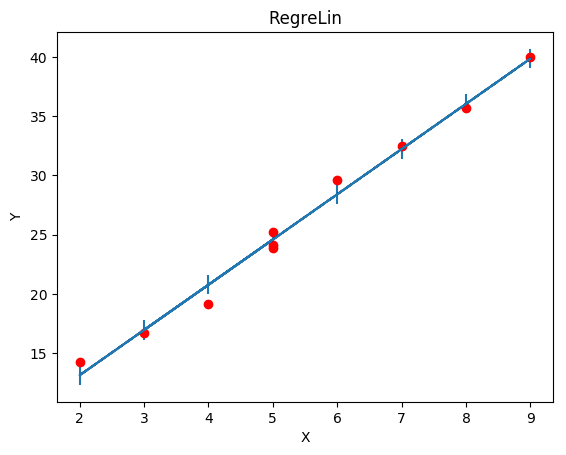

(5.523584905660412, 3.814150943396224, 0.8131118886083438)

In [54]:
reglin(x,yru, false, true)

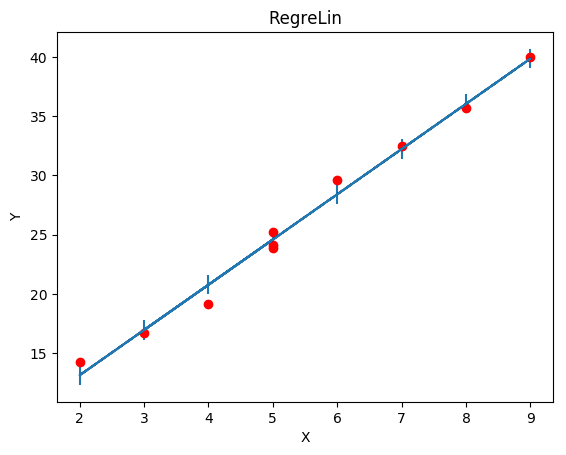

(5.523584905660412, 3.814150943396224, 0.8131118886083438, 0.9946833903667297)

In [55]:
reglin(x,yru,true,true)